# Task 1 : Exploratory Data Analysis (EDA) and Business Insights 

In [1]:
import pandas as pd

C:\Users\Ram\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_Transactions=pd.read_csv("Transactions.csv")
df_Products=pd.read_csv("Products.csv")
df_Customers=pd.read_csv("Customers.csv")

In [3]:
df_Products.head(5)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
df_Products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [5]:
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [6]:
df_Products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [7]:
df_Transactions.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
df_Transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [9]:
df_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:
df_Transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


# Analysis about Customer

In [11]:
df_Customers.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [12]:
df_Customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [13]:
df_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [14]:
df_Customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [15]:
Region=df_Customers['Region'].value_counts()
Region_Values=Region.values
Region_Values


array([59, 50, 46, 45], dtype=int64)

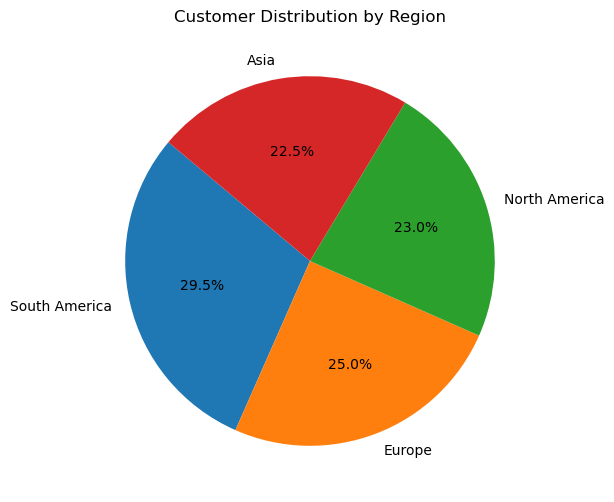

In [16]:
import matplotlib.pyplot as plt
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(Region_Values, labels=Region.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Region')
plt.show()


The **South America** region accounts for the largest share of customers, contributing 29.5% of the total customer base across all regions.

# Merging all dataset

In [17]:
df_Customers.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [18]:
df_Transactions.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [19]:
df_Products.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [20]:
df_Customers_Transactions=pd.merge(df_Customers,df_Transactions,on='CustomerID')

In [21]:
df_Customers_Transactions

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


In [22]:
df_Customers_Transactions_Products=pd.merge(df_Customers_Transactions,df_Products,on='ProductID')
df=df_Customers_Transactions_Products
df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,433.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,HomeSense T-Shirt,Clothing,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,ActiveWear Smartphone,Electronics,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,HomeSense Desk Lamp,Home Decor,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,TechPro Cookbook,Books,416.40


In [23]:
df.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_x',
       'ProductName', 'Category', 'Price_y'],
      dtype='object')

# Dropping some unrelated columns

In [24]:
new_df = df.drop(['CustomerID', 'CustomerName', 'TransactionID', 'ProductID','Price_x'], axis=1)
new_df.head(5)

,Region,SignupDate,TransactionDate,Quantity,TotalValue,ProductName,Category,Price_y
0,South America,2022-07-10,2024-01-19 03:12:55,2,114.60,SoundWave Cookbook,Books,57.30
1,South America,2022-07-10,2024-09-17 09:01:18,3,412.62,HomeSense Wall Art,Home Decor,137.54
2,South America,2022-07-10,2024-04-08 00:01:00,2,614.94,SoundWave Headphones,Electronics,307.47
3,South America,2022-07-10,2024-05-07 03:11:44,2,911.44,ActiveWear Smartwatch,Electronics,455.72
4,South America,2022-07-10,2024-11-02 17:04:16,3,1300.92,TechPro Headphones,Electronics,433.64


In [25]:
new_df=new_df.rename(columns={"Price_y":"Price"})
new_df

,Region,SignupDate,TransactionDate,Quantity,TotalValue,ProductName,Category,Price
0,South America,2022-07-10,2024-01-19 03:12:55,2,114.60,SoundWave Cookbook,Books,57.30
1,South America,2022-07-10,2024-09-17 09:01:18,3,412.62,HomeSense Wall Art,Home Decor,137.54
2,South America,2022-07-10,2024-04-08 00:01:00,2,614.94,SoundWave Headphones,Electronics,307.47
3,South America,2022-07-10,2024-05-07 03:11:44,2,911.44,ActiveWear Smartwatch,Electronics,455.72
4,South America,2022-07-10,2024-11-02 17:04:16,3,1300.92,TechPro Headphones,Electronics,433.64
...,...,...,...,...,...,...,...,...
995,Asia,2023-06-11,2024-12-11 03:05:50,4,868.20,HomeSense T-Shirt,Clothing,217.05
996,Asia,2023-06-11,2024-04-27 19:06:20,1,239.70,ActiveWear Smartphone,Electronics,239.70
997,Asia,2023-06-11,2024-07-15 20:36:28,4,627.84,HomeSense Desk Lamp,Home Decor,156.96
998,Asia,2023-06-11,2024-09-10 09:50:48,4,1665.60,TechPro Cookbook,Books,416.40


In [26]:
new_df.groupby('Region')['TotalValue'].sum()

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

The **South America** Region generates the highest revenue, indicating a strong market presence and significant customer engagement.

In [27]:
new_df.groupby('Category')['Quantity'].sum()

Category
Books          681
Clothing       590
Electronics    627
Home Decor     639
Name: Quantity, dtype: int64

The **Books category** has the highest number of sales, making it the top-performing category. This suggests a strong demand for books, and it could be a key focus for further business strategies and marketing efforts.

# Analysis on the basis of Region :

In [28]:
new_df['Region'].value_counts()

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

South America

In [29]:
South_America=new_df[new_df['Region']=='South America']

In [30]:
North_America=new_df[new_df['Region']=='North America']

In [31]:
Europe=new_df[new_df['Region']=='Europe']

In [32]:
Asia=new_df[new_df['Region']=='Asia']

In [33]:
South_America.head(5)

,Region,SignupDate,TransactionDate,Quantity,TotalValue,ProductName,Category,Price
0,South America,2022-07-10,2024-01-19 03:12:55,2,114.60,SoundWave Cookbook,Books,57.30
1,South America,2022-07-10,2024-09-17 09:01:18,3,412.62,HomeSense Wall Art,Home Decor,137.54
2,South America,2022-07-10,2024-04-08 00:01:00,2,614.94,SoundWave Headphones,Electronics,307.47
3,South America,2022-07-10,2024-05-07 03:11:44,2,911.44,ActiveWear Smartwatch,Electronics,455.72
4,South America,2022-07-10,2024-11-02 17:04:16,3,1300.92,TechPro Headphones,Electronics,433.64


In [34]:
South_America.groupby('Category')['Quantity'].mean()

Category
Books          2.677778
Clothing       2.507937
Electronics    2.506329
Home Decor     2.666667
Name: Quantity, dtype: float64

In **South America**, the **Books** and **Home Decor** categories dominate sales, reflecting strong customer demand in these segments. These categories could be strategic focal points for enhancing revenue and driving targeted marketing efforts in the region.

In [35]:
South_America.groupby('Category')['TotalValue'].mean()

Category
Books          775.022556
Clothing       673.706190
Electronics    744.890127
Home Decor     670.982222
Name: TotalValue, dtype: float64

In **South America**, the Books category generates the highest revenue, highlighting it as a key driver of sales in the region.

In [36]:
North_America.head(5)

,Region,SignupDate,TransactionDate,Quantity,TotalValue,ProductName,Category,Price
31,North America,2024-01-13,2024-09-22 06:13:59,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
32,North America,2024-01-13,2024-06-13 09:13:19,1,227.26,BookWorld Cookware Set,Home Decor,227.26
33,North America,2024-01-13,2024-11-08 20:46:29,1,147.22,TechPro Vase,Home Decor,147.22
34,North America,2024-01-13,2024-08-01 14:20:03,1,447.23,TechPro Novel,Books,447.23
35,North America,2024-01-13,2024-03-26 20:30:49,2,392.80,SoundWave Headphones,Electronics,196.40


In [37]:
North_America.groupby('Category')['Quantity'].mean()

Category
Books          2.384615
Clothing       2.450000
Electronics    2.550000
Home Decor     2.338983
Name: Quantity, dtype: float64

In North America, the Electronics category has the highest number of sales, indicating a strong demand for electronic products in the region.

In [38]:
North_America.groupby('Category')['TotalValue'].sum()

Category
Books          41811.99
Clothing       38038.49
Electronics    44716.43
Home Decor     27746.49
Name: TotalValue, dtype: float64

In North America, the Books category generates the highest revenue, showcasing its significant contribution to the region's overall earnings

In [39]:
Europe.head(5)

,Region,SignupDate,TransactionDate,Quantity,TotalValue,ProductName,Category,Price
41,Europe,2023-08-14,2024-03-16 17:26:03,1,155.65,HomeSense T-Shirt,Clothing,155.65
42,Europe,2023-08-14,2024-10-12 04:57:16,1,437.65,ActiveWear Smartwatch,Electronics,437.65
43,Europe,2023-08-14,2024-10-12 06:41:00,1,303.20,SoundWave Jeans,Clothing,303.20
44,Europe,2022-12-15,2024-02-22 18:44:05,2,295.90,TechPro Textbook,Books,147.95
45,Europe,2022-12-15,2024-11-16 18:14:23,3,1117.65,BookWorld Jacket,Clothing,372.55


In [40]:
Europe.groupby('Category')['Quantity'].mean()

Category
Books          2.578125
Clothing       2.531915
Electronics    2.482759
Home Decor     2.569231
Name: Quantity, dtype: float64

In **Europe**, the **Books** and **Home Decor** categories record the highest number of sales, reflecting strong customer demand and popularity in these segments.

In [41]:
Europe.groupby('Category')['TotalValue'].sum()

Category
Books          47464.42
Clothing       36335.59
Electronics    41562.60
Home Decor     40892.02
Name: TotalValue, dtype: float64

In **Europe**, the **Books** category generates the highest revenue, underscoring its significant contribution to the region's overall earnings and strong customer preference.

In [42]:
Asia.head(5)

,Region,SignupDate,TransactionDate,Quantity,TotalValue,ProductName,Category,Price
5,Asia,2022-02-13,2024-07-12 10:18:13,2,454.52,BookWorld Cookware Set,Home Decor,227.26
6,Asia,2022-02-13,2024-06-11 23:59:08,4,382.76,BookWorld Rug,Home Decor,95.69
7,Asia,2022-02-13,2024-02-28 07:44:21,2,770.74,ComfortLiving Sweater,Clothing,385.37
8,Asia,2022-02-13,2024-12-03 01:41:41,2,254.72,TechPro T-Shirt,Clothing,127.36
21,Asia,2022-08-15,2024-05-05 13:03:41,3,853.86,ActiveWear Cookware Set,Home Decor,284.62


In [43]:
Asia.groupby('Category')['Quantity'].mean()

Category
Books          2.352941
Clothing       2.862069
Electronics    2.315789
Home Decor     2.730769
Name: Quantity, dtype: float64

In **Asia**, the **Clothing** and **Home Decor** categories have the highest number of sales, indicating strong customer demand in these segments.

In [44]:
Asia.groupby('Category')['TotalValue'].sum()

Category
Books          33119.03
Clothing       49353.09
Electronics    35658.15
Home Decor     33944.70
Name: TotalValue, dtype: float64

In **Asia**, the **Clothing** category generates the highest revenue, highlighting its strong market performance and significant contribution to the region's overall earnings.